In [71]:
import pandas
import numpy as np
from math import sqrt, factorial
from scipy.stats import binom, ttest_ind
import operator

import matplotlib.pyplot as plt

MY_TITANIC_TRAIN ='./sample_data/train.csv'
df = pandas.read_csv(MY_TITANIC_TRAIN)
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [72]:
prob_survive = df[df.Survived == 1]['Survived'].count() / df['Survived'].count()
print(prob_survive)

0.383838383838


#### Probability of survival is 38.38%

In [73]:
df['Gender'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
prob_manly_man = df[df.Gender == 1]['Gender'].count() / df['Gender'].count()
print(prob_manly_man)

0.64758698092


#### Probability of being a man is 64.76%

In [74]:
df['Embarked'].fillna(method='ffill', inplace=True)
df['Port'] = df['Embarked'].map({'C':1, 'S':2, 'Q':3}).astype(int)
prob_cher_alive = df[(df.Port == 1) & (df.Survived == 1)]['Survived'].count() / df[df.Survived == 1]['Survived'].count()
print(prob_cher_alive)

0.27485380117


### Probability of a survivor being from Cherbourg in 27.48%

## Plot data of Ages on Titanic in Histogram

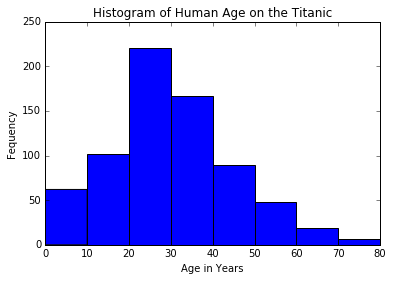

In [75]:
%matplotlib inline
plt.hist(df.Age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.xlabel('Age in Years')
plt.ylabel('Fequency')
plt.title('Histogram of Human Age on the Titanic')

In [76]:
prob_babychild = df[df.Age < 10]['Age'].count() / df['Age'].count()
print(prob_babychild)

0.0868347338936


### Probability that a child is younger than 10 is 8.68%

In [77]:
# def binomial(successes, prob, trials):
#     return float(factorial(trials)) / (factorial(successes) * factorial(trials - successes)) * prob ** successes * (1 - prob)**(trials - successes)
# binomial(42, .3838, 100)
binom.pmf(42, 100, .3838)

0.0612944086909794

### There is a 6.13% chance exactly 42 of 100 people would live given the survival rate of passengers on the titanic.

In [78]:
binom.cdf(41, 100, .3838)
print(1 - cumulative)

0.197855308377


### There is a 19.78% chance at least 42 of 100 people would live given the survival rate of passengers on the titanic.

T-Value: 0.8351170125126802 , P-value: 0.40434406202205564


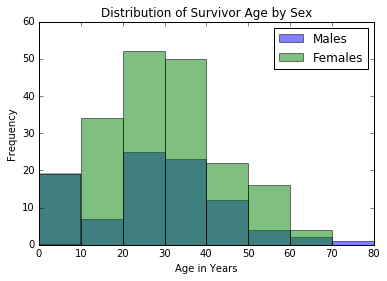

In [100]:
females = df[(df.Gender == 0) & (df.Survived == 1)]['Age']
males = df[(df.Gender == 1) & (df.Survived == 1)]['Age']
t_stat, p_stat = ttest_ind(females, males, nan_policy='omit')
print("T-Value: {} , P-value: {}".format(t_stat, p_stat))
plt.hist(males, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], alpha=0.5, label="Males")
plt.hist(females, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], alpha=0.5, label="Females")
plt.legend()
plt.xlabel("Age in Years")
plt.ylabel("Frequency")
plt.title("Distribution of Survivor Age by Sex")

### The age difference between female and male survivors is statistically insignificant ( p = .40); could be explained by a relatively small population.

T-Value: -4.803544710310478 , P-value: 2.7171341311724945e-06


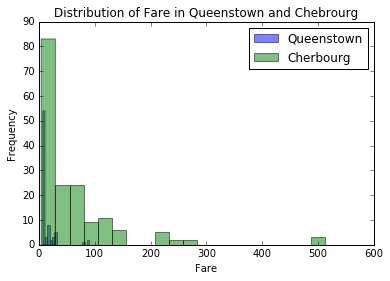

In [113]:
qnt = df[(df.Port == 3)]['Fare']
cher = df[(df.Port == 1)]['Fare']
t_stat, p_stat = ttest_ind(qnt, cher, nan_policy='omit')
print("T-Value: {} , P-value: {}".format(t_stat, p_stat))
plt.hist(qnt, bins=20, alpha=0.5, label="Queenstown")
plt.hist(cher, bins=20, alpha=0.5, label="Cherbourg")
plt.legend()
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of Fare in Queenstown and Chebrourg")

### The difference in fares paid by passengers from Queenstown vs Cherbourg are extremly statistically significant at the p>0.01 level ( p= 2.717e-06).
